<a href="https://colab.research.google.com/github/chirucodes/aiml/blob/main/Group4_AIC_final_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reference Links to follow


A - DONE - download -> f8k -> with out attention -> with out optimizer
B - DONE - download -> f8k -> with out attention -> with optimizer

C - download -> f8k -> with attention -> with out optimizer
D - download -> f8k -> with attention -> with optimizer

E - download -> f8k -> with transformer


In [1]:
# Add reference links below

# https://www.analyticsvidhya.com/blog/2018/04/solving-an-image-captioning-task-using-deep-learning/
# https://rupamgoyal12.medium.com/image-caption-generator-using-resnet50-and-lstm-model-a5b11f60cd23
# https://www.analyticsvidhya.com/blog/2019/11/comprehensive-guide-attention-mechanism-deep-learning/


## Hyper Parameters

In [2]:
HYP_DEBUG = True

HYP_DATASET = "Download"      # Drive Or Download  or SKIP

HYP_SOURCE_DATA_SET = "F8K" # "F30K" / "COCO123K"
HYP_ENCODER_MODEL = "RESNET50" #"RESNET50" VGG16, INCEPTIONV3 , etc
HYP_WORD_EMBEDDING = "GLOVE" # word2vec, etc

HYP_DECODER_LOSS = 'categorical_crossentropy'
HYP_DECODER_OPTIMIZER = 'adam'
HYP_NO_OF_PICS_PER_BATCH = 100
HYP_EPOCH = 45
HYP_DECODER_LEARNING_RATE = 0.0001

HYP_ENABLE_ATTENTION = False # False

HYP_ENABLE_OPTIMIZER = False
HYP_ENABLE_TRANSFORMER = True

HYP_GENERATE_BLEU_SCORE = True
HYP_GENERATE_METEOR_SCORE = True

## Import Modules

In [3]:
# To list file in a directory
import glob

# Image preprocessing / converting image into feature vectors
from keras.preprocessing import image
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

# For Dataset
from google.colab import drive

# Encoder Models in the architecture
if HYP_ENCODER_MODEL == "RESNET50":
    from tensorflow.keras.applications.resnet50 import preprocess_input
    from tensorflow.keras.applications.resnet50 import ResNet50

elif HYP_ENCODER_MODEL == "VGG16":
    from keras.applications.vgg16 import preprocess_input
    from keras.applications.vgg16 import VGG16

elif HYP_ENCODER_MODEL == "INCEPTIONV3":
    from tensorflow.keras.applications.inception_v3 import preprocess_input
    from tensorflow.keras.applications.inception_v3 import InceptionV3

else:
    print("Invalid HYP_ENCODER_MODEL")

from keras.models import Model

# Execution time calculation
from time import time

# Creating binary files
from pickle import dump, load

# For Image Processing
from keras.preprocessing.image import img_to_array , load_img #, array_to_img
from sklearn.utils import shuffle
import pandas as pd

# Text processing
import string

# Utils-For joining os path
import os

# LSTM architecture
import tensorflow
from tensorflow.keras.utils import plot_model

import keras
from keras import Input
from keras.layers import Dropout, Dense, Embedding, LSTM
from keras.layers import Layer
from keras.layers.merge import add
import keras.backend as K
from keras.models import Model

# For caption generation in the userinterface
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from numpy import array
import matplotlib.pyplot as plt

from tqdm import tqdm

# For ACCURACY METRICS-BLEU score
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.meteor_score import meteor_score
if HYP_GENERATE_METEOR_SCORE:
    import nltk
    nltk.download('wordnet')
    nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


## Mount GDrive / Download and Unzip - Flickr8K / Flickr30K / COCO123K Dataset 

In [4]:
if HYP_DATASET == "Drive":
    drive.mount('/content/drive')
    images = glob.glob("/content/drive/MyDrive/AI ML/AIC Project/datasets/Flicker8k/Images")
    if HYP_SOURCE_DATA_SET == "F8K":
        pass
    elif HYP_SOURCE_DATA_SET == "F30K":
        pass
    elif HYP_SOURCE_DATA_SET == "COCO123K":
        pass

elif  HYP_DATASET == "Download":  
    if HYP_SOURCE_DATA_SET == "F8K":
        print("Dowloading Flickr8K Dataset")
        !rm -rf Flickr8k_Dataset.zip
        !rm -rf Flickr8k_text.zip
        !wget https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip -O Flickr8k_Dataset.zip
        !wget https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_text.zip -O Flickr8k_text.zip
        !unzip Flickr8k_Dataset.zip
        !unzip Flickr8k_text.zip
    
    elif HYP_SOURCE_DATA_SET == "F30K":
        print("Dowloading Flickr30K Dataset")
        !rm -rf Flickr8k_Dataset.zip
        !rm -rf Flickr8k_text.zip
        !wget https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip -O Flickr8k_Dataset.zip
        !wget https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_text.zip -O Flickr8k_text.zip
        !unzip Flickr8k_Dataset.zip
        !unzip Flickr8k_text.zip
    
    elif HYP_SOURCE_DATA_SET == "COCO123K":
        print("Dowloading COCO123K Dataset")
        !rm -rf Flickr8k_Dataset.zip
        !rm -rf Flickr8k_text.zip
        !wget https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip -O Flickr8k_Dataset.zip
        !wget https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_text.zip -O Flickr8k_text.zip
        !unzip Flickr8k_Dataset.zip
        !unzip Flickr8k_text.zip

    else:
        print("ERROR: Invalid Dataset type")

elif  HYP_DATASET == "SKIP": 
    print("Using the already downloaded data")

else:
    print("ERROR: Invalid source for the dataset")

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/Flicker8k_Dataset/._3429391520_930b153f94.jpg  
  inflating: Flicker8k_Dataset/3429465163_fb8ac7ce7f.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3429465163_fb8ac7ce7f.jpg  
  inflating: Flicker8k_Dataset/3429581486_4556471d1a.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3429581486_4556471d1a.jpg  
  inflating: Flicker8k_Dataset/3429641260_2f035c1813.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3429641260_2f035c1813.jpg  
  inflating: Flicker8k_Dataset/3429956016_3c7e3096c2.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3429956016_3c7e3096c2.jpg  
  inflating: Flicker8k_Dataset/3430100177_5864bf1e73.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3430100177_5864bf1e73.jpg  
  inflating: Flicker8k_Dataset/3430287726_94a1825bbf.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3430287726_94a1825bbf.jpg  
  inflating: Flicker8k_Dataset/3430526230_234b3550f6.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3430

## Initialise data source paths

In [5]:
if HYP_SOURCE_DATA_SET == "F8K":
    # Below path contains all the images
    image_path = "/content/Flicker8k_Dataset/"
    dir_Flickr_text = "/content/Flickr8k.token.txt"

    if not HYP_ENABLE_TRANSFORMER:

        # Below file conatains the names of images to be used in train data
        train_images_file = '/content/Flickr_8k.trainImages.txt'

        # Below file conatains the names of images to be used in test data
        test_images_file = '/content/Flickr_8k.testImages.txt'

elif HYP_SOURCE_DATA_SET == "F30K":
    # Below path contains all the images
    image_path = "/content/Flicker30k_Dataset"
    
    # Below file conatains the names of images to be used in train data
    train_images_file = ''

    # Below file conatains the names of images to be used in test data
    test_images_file = ''

elif HYP_SOURCE_DATA_SET == "COCO123K":
    # Below path contains all the images
    image_path = "/content/COCO123K_Dataset"

    # Below file conatains the names of images to be used in train data
    train_images_file = ''

    # Below file conatains the names of images to be used in test data
    test_images_file = ''

else:
    print("Invalid HYP_SOURCE_DATA_SET")

## Extract Image Features 

###### Defining Data Source Variables and initialise **Train and Test images list**

In [6]:
if not HYP_ENABLE_TRANSFORMER:
    # Train + Test
    
    # Create a "LIST" of all image names in the directory
    img = glob.glob(image_path + '*.jpg')
    
    if HYP_DEBUG:
        print("Debug Info: img")
        print(type(img)) 
        print("\n".join(img[:5]) )

    
    # Read the train image names in a set
    train_images = set(open(train_images_file, 'r').read().strip().split('\n'))
    if HYP_DEBUG:
        print("\nDebug Info:train_images")
        print(type(train_images), len(train_images))
        print("\n".join(list(train_images)[:5]))

    
    # Read the validation image names in a set 
    test_images = set(open(test_images_file, 'r').read().strip().split('\n'))
    if HYP_DEBUG:
        print("\nDebug Info:test_images")
        print(type(test_images), len(test_images))
        print("\n".join(list(train_images)[:5]))

    

In [7]:
if not HYP_ENABLE_TRANSFORMER:
     # Create a list of all the training images with their full path names
    train_img = []
    for i in img: # img is list of full path names of all images
        if i[len(image_path):] in train_images: # Check if the image belongs to training set
            train_img.append(i) # Add it to the list of train images
    if HYP_DEBUG:    
        print(type(train_img), len(train_img))
        print(train_img[:5])

In [8]:
if not HYP_ENABLE_TRANSFORMER:
    # Create a list of all the test images with their full path names
    test_img = []

    for i in img: # img is list of full path names of all images
         if i[len(image_path):] in test_images: # Check if the image belongs to test set
             test_img.append(i) # Add it to the list of test images
    if HYP_DEBUG:    
        print(type(test_img), len(test_img))
        print(test_img[:5])

##### Preprocessing

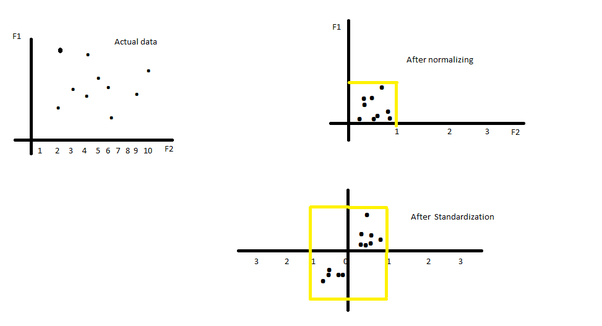

In [9]:
def preprocess(image_path):
    # Convert all the images to size 299x299 as expected by the inception v3 model(To be replaced with ResNet50)
    # from keras.preprocessing import image

    if HYP_ENCODER_MODEL == "RESNET50":
        img = load_img(image_path, target_size=(224, 224))
        
    elif HYP_ENCODER_MODEL == "INCEPTIONV3":
        img = image.load_img(image_path, target_size=(299, 299))
    
    # Convert PIL image to numpy array of 3-dimensions
    x = img_to_array(img)

    # Add one more dimension
    x = np.expand_dims(x, axis=0)
    
    # from keras.applications.inception_v3 import preprocess_input
    # from keras.applications.resnet50 import preprocess_input 
    x = preprocess_input(x)
    return x

In [10]:
if HYP_DEBUG:
    tmp_tst_img='/content/Flicker8k_Dataset/2450453051_f1d4a78ab4.jpg'
    tmp_tst_img_op = preprocess(tmp_tst_img)
    print(tmp_tst_img_op.shape)

(1, 224, 224, 3)


###### Encoder Model Architecture

In [11]:
if HYP_ENCODER_MODEL == "RESNET50":
    if HYP_ENABLE_TRANSFORMER:
        print("ResNet50 with Transformer")
        model = ResNet50(include_top=False,weights='imagenet',input_shape=(224, 224,3),pooling="avg")
        new_input = model.input
        hidden_layer = model.layers[-2].output
        image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

    else:
        print("ResNet50 without Transformer")
        model = ResNet50(weights='imagenet')
    
    model_new = Model(model.input, model.layers[-2].output)

elif HYP_ENCODER_MODEL == "VGG16":
    model = VGG16(include_top=False, weights='imagenet')
    model_new = Model(model.input, model.layers[-1].output)
    
elif HYP_ENCODER_MODEL == "INCEPTIONV3":
    model = InceptionV3(include_top=False, weights='imagenet')
    model_new = Model(model.input, model.output)

else:
    print("Invalid HYP_ENCODER_MODEL")

ResNet50 with Transformer
94781440/94765736 [==============================] - 0s 0us/step


In [12]:
if HYP_DEBUG:
    model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [13]:
if HYP_DEBUG:
    model_new.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [14]:
if HYP_DEBUG:
    print("\nDebug Info: model_new.output")
    print(model_new.output)
    print("\n\n")
    print("\nDebug Info: model_new.layers")
    #print("\n".join(list(map(str,model_new.layers))))
    print(len(model_new.layers))


Debug Info: model_new.output
KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 2048), dtype=tf.float32, name=None), name='conv5_block3_out/Relu:0', description="created by layer 'conv5_block3_out'")




Debug Info: model_new.layers
175


In [15]:
# Function to encode a given image into a vector of size (2048, )
if not HYP_ENABLE_TRANSFORMER:
    def encode(image):
        image = preprocess(image) # preprocess the image - user defined method
        fea_vec = model_new.predict(image) # Get the encoding vector for the image
        fea_vec = np.reshape(fea_vec, fea_vec.shape[1]) # reshape from (1, 2048) to (2048, )
        return fea_vec

In [16]:
if HYP_DEBUG and not HYP_ENABLE_TRANSFORMER:
    image = preprocess(train_img[0])
    print("Debug Info: after preprocess and before encode - image")
    print(image.shape)

    print("\n\n")

    temp_enc = encode(train_img[0])
    print("Debug Info: after encode - temp_enc")
    print(temp_enc.shape)

###### Get feature vectors for **train images**

In [17]:
if HYP_ENABLE_TRANSFORMER:
    print("no need to encode")
else:
    # Call the funtion to encode all the train images
    start = time()
    encoding_train = {}
    for img in train_img:
        encoding_train[img[len(image_path):]] = encode(img)
    print("Time taken in seconds =", time()-start)

no need to encode


In [18]:
if HYP_DEBUG and not HYP_ENABLE_TRANSFORMER:
    key1, val1 = list(encoding_train.items())[0]
    print("Debug Info:encoding_train")
    print(type(encoding_train), len(encoding_train.keys()))
    print("key1: ", key1)
    print("val1.shape: ", val1.shape)



###### Get feature vectors for **test images**

In [19]:
if HYP_ENABLE_TRANSFORMER:
    print("No need of any action")
else:
    # Call the funtion to encode all the test images - Execute this only once
    start = time()
    encoding_test = {}
    for img in test_img:
        encoding_test[img[len(image_path):]] = encode(img)
    print("Time taken in seconds =", time()-start)

    if HYP_DEBUG:
        key1, val1 = list(encoding_test.items())[0]
        print("Debug Info:encoding_test")
        print(type(encoding_test), len(encoding_test.keys()), val1.shape)
        print("key1: ", key1)
        print("val1.shape: ", val1.shape)


No need of any action


##### Dump the feature vectors of train and test images into a file using pickle mechanism

In [20]:
if not HYP_ENABLE_TRANSFORMER:
    !mkdir "/content/sample_data/Pickle"
    pkl_train_file="/content/sample_data/Pickle/encoded_train_images.pkl"
    pkl_test_file = "/content/sample_data/Pickle/encoded_test_images.pkl"

    # Save the encoded feature vectors for train images to disk
    with open(pkl_train_file, "wb") as encoded_pickle:
        dump(encoding_train, encoded_pickle)

    # Save the encoded feature vectors for test images to disk
    with open(pkl_test_file, "wb") as encoded_pickle:
        dump(encoding_test, encoded_pickle)
else:
    print("no need of any action")
    # np.save code is already there in the down

no need of any action


## Extract Text Features

###### Loading the text from given dataset into workspace

In [21]:
if HYP_ENABLE_TRANSFORMER:
    file = open(dir_Flickr_text,'r')
    text = file.read()
    file.close()

    datatxt = []
    for line in text.split('\n'):
        col = line.split('\t')
        if len(col) == 1:
            continue
        w = col[0].split("#")
        datatxt.append(w + [col[1].lower()])

    data = pd.DataFrame(datatxt,columns=["filename","index","caption"])
    data = data.reindex(columns =['index','filename','caption'])
    data = data[data['filename'] != '2258277193_586949ec62.jpg.1']

    uni_filenames = np.unique(data.filename.values)
    if HYP_DEBUG:
        print(data.head())
        print("\n\n List of Unique file names:")
        print(uni_filenames)

        img = data["filename"].tolist()
        caption = data["caption"].tolist()
        print(f"len(img) : {len(img)}")
        print(f"len(caption) : {len(caption)}")

# N images X 5 captions
if HYP_DEBUG and HYP_ENABLE_TRANSFORMER:
    img = data["filename"].tolist()
    caption = data["caption"].tolist()
    print(f"len(img) : {len(img)}")
    print(f"len(caption) : {len(caption)}")

  index                   filename  \
0     0  1000268201_693b08cb0e.jpg   
1     1  1000268201_693b08cb0e.jpg   
2     2  1000268201_693b08cb0e.jpg   
3     3  1000268201_693b08cb0e.jpg   
4     4  1000268201_693b08cb0e.jpg   

                                             caption  
0  a child in a pink dress is climbing up a set o...  
1              a girl going into a wooden building .  
2   a little girl climbing into a wooden playhouse .  
3  a little girl climbing the stairs to her playh...  
4  a little girl in a pink dress going into a woo...  


 List of Unique file names:
['1000268201_693b08cb0e.jpg' '1001773457_577c3a7d70.jpg'
 '1002674143_1b742ab4b8.jpg' ... '99679241_adc853a5c0.jpg'
 '997338199_7343367d7f.jpg' '997722733_0cb5439472.jpg']
len(img) : 40455
len(caption) : 40455
len(img) : 40455
len(caption) : 40455


###### Clean up the text

In [22]:
#Defining Some Functions to aid in Text Processing
if HYP_ENABLE_TRANSFORMER:
    """ 
    Removing punctuations , 
    Single characters , 
    Numeric values from the word/Vocabulary , 
    having them would make increase the probability of such words over others due to repetitive usage
    giving undesired results """
    
    # To remove punctuations
    def remove_punctuation(text_original):
        text_no_punctuation = text_original.translate(string.punctuation)
        return(text_no_punctuation)

    # To remove single characters
    def remove_single_character(text):
        text_len_more_than1 = ""
        for word in text.split():
            if len(word) > 1:
                text_len_more_than1 += " " + word
        return(text_len_more_than1)

    # To remove numeric values
    def remove_numeric(text):
        text_no_numeric = ""
        for word in text.split():
            isalpha = word.isalpha()
            if isalpha:
                text_no_numeric += " " + word
        return(text_no_numeric)

    """ 
    Cleaning up the original text without 
    punctuations, 
    single characters and 
    numeric values 
    """
    def text_clean(text_original):
        text = remove_punctuation(text_original)
        text = remove_single_character(text)
        text = remove_numeric(text)
        return(text)

elif not HYP_ENABLE_TRANSFORMER:
    # load doc into memory
    def load_doc(filename):
        # open the file as read only
        file = open(filename, 'r')
        # read all text
        text = file.read()
        # close the file
        file.close()
        return text

    # Prepare a dict of Image key and image specific descriptions
    def load_descriptions(doc):
        mapping = dict()
        # process lines
        for line in doc.split('\n'):
            # split line by white space
            tokens = line.split()
            if len(line) < 2:
                continue
            # take the first token as the image id, the rest as the description
            image_id, image_desc = tokens[0], tokens[1:]
            # extract filename from image id
            image_id = image_id.split('.')[0]
            # convert description tokens back to string
            image_desc = ' '.join(image_desc)
            # create the list if needed
            if image_id not in mapping:
                mapping[image_id] = list()
            # store description
            mapping[image_id].append(image_desc)
        return mapping
    
    """
    prepare translation table for removing punctuation
    tokenize
    convert to lower case
    remove punctuation from each token
    remove hanging 's' and 'a'
    remove tokens with numbers in them
    store as string
    """

    def clean_descriptions(descriptions):
        # prepare translation table for removing punctuation
        table = str.maketrans('', '', string.punctuation)
        for key, desc_list in descriptions.items():
            for i in range(len(desc_list)):
                desc = desc_list[i]
                # tokenize
                desc = desc.split()
                # convert to lower case
                desc = [word.lower() for word in desc]
                # remove punctuation from each token
                desc = [w.translate(table) for w in desc]
                # remove hanging 's' and 'a'
                desc = [word for word in desc if len(word)>1]
                # remove tokens with numbers in them
                desc = [word for word in desc if word.isalpha()]
                # store as string
                desc_list[i] =  ' '.join(desc)


In [23]:
if not HYP_ENABLE_TRANSFORMER:
    print("------------------------load_doc--------------------------")
    doc = load_doc(dir_Flickr_text)
    if HYP_DEBUG:
        print("Debug Info:Flickr8k.token.txt Content")
        print(doc[:300])
    print("------------------------load_doc--------------------------\n\n\n")


    print("------------------------load_descriptions--------------------------")
    descriptions = load_descriptions(doc)
    print('Loaded: %d ' % len(descriptions))
    
    if HYP_DEBUG:
        print("Debug Info: descriptions")
        print(type(descriptions), list(descriptions.items())[0], "\n".join(list(descriptions.keys())[:5]))
        print("\n\n")
        print(descriptions['10815824_2997e03d76'][2])
    print("------------------------load_descriptions--------------------------\n\n\n")


    print("------------------------clean_descriptions--------------------------")  
    clean_descriptions(descriptions)
    if HYP_DEBUG:
        for key_t, value_t in descriptions.items():
            print(key_t, ':', value_t)
            break
    print("------------------------clean_descriptions--------------------------\n\n\n")


In [24]:
if HYP_ENABLE_TRANSFORMER:
    for i, caption in enumerate(data.caption.values):
        newcaption = text_clean(caption)
        data["caption"].iloc[i] = newcaption

In [25]:
#building clean vocabulary
if HYP_ENABLE_TRANSFORMER:
    clean_vocabulary = []
    for txt in data.caption.values:
        clean_vocabulary.extend(txt.split())
    print('Clean Vocabulary Size: %d' % len(set(clean_vocabulary)))

Clean Vocabulary Size: 8357


###### Prepare vocabulary of words

In [26]:
if HYP_ENABLE_TRANSFORMER:
    vocabulary = []
    for txt in data.caption.values:
        vocabulary.extend(txt.split())
    print('Vocabulary Size: %d' % len(set(vocabulary)))

else:
    # convert the loaded descriptions into a vocabulary of words - vow
    def to_vocabulary(descriptions):
        # build a list of all description strings
        all_desc = set()
        for key in descriptions.keys():
            [all_desc.update(d.split()) for d in descriptions[key]]
        return all_desc


    # save descriptions to file, one per line
    def save_descriptions(descriptions, filename):
        lines = list()
        for key, desc_list in descriptions.items():
            for desc in desc_list:
                lines.append(key + ' ' + desc)
        data = '\n'.join(lines)
        file = open(filename, 'w')
        file.write(data)
        file.close()

    # summarize vocabulary
    vocabulary = to_vocabulary(descriptions)
    print('Original Vocabulary Size: %d' % len(vocabulary))
    type(vocabulary), list(vocabulary)[:5]

    save_descriptions(descriptions, 'descriptions.txt')

vocab_size = len(vocabulary)#Revisit this with any issue to vocab_size

Vocabulary Size: 8357


## Train and test data sets


#### Load Images into a variable

In [27]:
if not HYP_ENABLE_TRANSFORMER:
    # load a pre-defined list of photo identifiers
    def load_set(filename):

        doc = load_doc(filename)
        dataset = list()
        # process line by line
        for line in doc.split('\n'):
            # skip empty lines
            if len(line) < 1:
                continue
            # get the image identifier
            identifier = line.split('.')[0]
            dataset.append(identifier)
        return set(dataset)

    # load training dataset (6K)
    train = load_set(train_images_file)
    print('Dataset: %d' % len(train))
    print("train[:5]",list(train)[:5])

In [28]:
if HYP_ENABLE_TRANSFORMER:
    #building path to read each image from the content downloaded
    all_img_name_vector = []

    for annot in data["filename"]:
        full_image_path = image_path + annot

        all_img_name_vector.append(full_image_path)
    all_img_name_vector[:10]
    print(f"len(all_img_name_vector) : {len(all_img_name_vector)}")

len(all_img_name_vector) : 40455


#### Load Descriptions into a variable


In [29]:
if not HYP_ENABLE_TRANSFORMER:
    # load clean descriptions into memory
    def load_clean_descriptions(filename, dataset):
        # load document
        doc = load_doc(filename)
        descriptions = dict()
        for line in doc.split('\n'):
            # split line by white space
            tokens = line.split()
            # split id from description
            image_id, image_desc = tokens[0], tokens[1:]
            # skip images not in the set
            if image_id in dataset:
                # create list
                if image_id not in descriptions:
                    descriptions[image_id] = list()
                # wrap description in tokens
                desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
                # store
                descriptions[image_id].append(desc)
        return descriptions

    # descriptions
    train_descriptions = load_clean_descriptions('descriptions.txt', train)

    if HYP_DEBUG:
        print('Descriptions: train=%d' % len(train_descriptions))
        print(list(train_descriptions.items())[0])

In [30]:
if HYP_ENABLE_TRANSFORMER:
    # adding <start> and <end> tags to sentences to identify the start and 
    # end of the sentences while looping through words in sentence
    all_captions = []

    for caption  in data["caption"].astype(str):
        caption = '<start> ' + caption+ ' <end>'
        all_captions.append(caption)
    all_captions[:10]
        
    print(f"len(all_captions) : {len(all_captions)}")

len(all_captions) : 40455


#### Image feature extractor - for transformers





In [31]:
if HYP_ENABLE_TRANSFORMER:
    def data_limiter(num,total_captions,all_img_name_vector):
        train_captions, img_name_vector = shuffle(total_captions,all_img_name_vector,random_state=1)
        train_captions = train_captions[:num]
        img_name_vector = img_name_vector[:num]
        return train_captions,img_name_vector

In [32]:
if HYP_ENABLE_TRANSFORMER:
    train_captions,img_name_vector = data_limiter(40000,all_captions,all_img_name_vector)
    print(f"len(all_captions) : {len(train_captions)}")
    print(f"len(all_img_name_vector) : {len(img_name_vector)}")


len(all_captions) : 40000
len(all_img_name_vector) : 40000


In [33]:
if HYP_ENABLE_TRANSFORMER:
    #Loading an image with (224,224,3) for passing to Encoder Resnet50
    def load_image(image_path):
        img = tf.io.read_file(image_path)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, (224, 224))
        return img, image_path

In [34]:
#Saving images with .jpg.npy. this is the pre-requisite for feature vector of image creation
if HYP_ENABLE_TRANSFORMER:
    # Get unique images
    encode_train = sorted(set(img_name_vector))

    # Batch size 16
    image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
    image_dataset = image_dataset.map(
        load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(16)
    #Building Image feature vector using Resnet50 Encoder
    for img, path in tqdm(image_dataset):
        batch_features = image_features_extract_model(img)
        # converting image from Resnet (16,7,7,2048) to (16,49,2048)
        batch_features = tf.reshape(batch_features,
                                    (batch_features.shape[0], -1, batch_features.shape[3]))

        for bf, p in zip(batch_features, path):
            path_of_feature = p.numpy().decode("utf-8")
            np.save(path_of_feature, bf.numpy())

100%|██████████| 506/506 [01:17<00:00,  6.56it/s]


In [35]:
if HYP_ENABLE_TRANSFORMER and HYP_DEBUG:
    for img1, path1 in tqdm(image_dataset):
        batch_features1 = image_features_extract_model(img1)
        print("shape",batch_features1.shape)
        print("batch_features.shape[0]",batch_features1.shape[0])
        print("batch_features.shape[1]",batch_features1.shape[1])
        print("batch_features.shape[2]",batch_features1.shape[2])
        print("batch_features.shape[3]",batch_features1.shape[3])
        batch_features2 = tf.reshape(batch_features1,
                                     (batch_features1.shape[0], -1, batch_features1.shape[3]))
        print("shape",batch_features2.shape)
        print("batch_features2.shape[0]",batch_features2.shape[0])
        print("batch_features2.shape[1]",batch_features2.shape[1])
        print("batch_features2.shape[2]",batch_features2.shape[2])
        #print("batch_features2.shape[3]",batch_features2.shape[3])
        break

  0%|          | 0/506 [00:00<?, ?it/s]

shape (16, 7, 7, 2048)
batch_features.shape[0] 16
batch_features.shape[1] 7
batch_features.shape[2] 7
batch_features.shape[3] 2048
shape (16, 49, 2048)
batch_features2.shape[0] 16
batch_features2.shape[1] 49
batch_features2.shape[2] 2048


###### Word-2-Index and Index-2-Word

In [36]:
if HYP_ENABLE_TRANSFORMER:
    top_k = 5000
    #Building a Word embedding for top 5000 words in the captions
    tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_k,
                                                      oov_token="<unk>",
                                                      filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')
    tokenizer.fit_on_texts(train_captions)
    train_seqs = tokenizer.texts_to_sequences(train_captions)
else:

    def get_captions(img_descriptions_map):
        # Create a list of all the training captions
        all_captions = []
        for key, val in img_descriptions_map.items():
            for cap in val:
                all_captions.append(cap)
            # if True:
                # break
        len(all_captions) #, all_train_captions
        return all_captions

    
    def get_vocab(captions):
        word_count_threshold = 10
        word_counts = {}
        nsents = 0

        for sent in captions:
            nsents += 1
            for w in sent.split(' '):
                word_counts[w] = word_counts.get(w, 0) + 1

        vocab = [w for w in word_counts if word_counts[w] >= word_count_threshold]
        print('preprocessed words [Actual words] %d -> [Words which are having >= 10 threshold] %d' % (len(word_counts), len(vocab)))
        return vocab
        
    all_train_captions = get_captions(train_descriptions)
    vocab = get_vocab(all_train_captions)

    ixtoword = {}
    wordtoix = {}

    ix = 1
    for w in vocab:
        wordtoix[w] = ix
        ixtoword[ix] = w
        ix += 1
    vocab_size = len(ixtoword) + 1 # one for appended 0's
    print("vocab_size: ",vocab_size)


    # if not HYP_ENABLE_TRANSFORMER:
    pkl_wordtoix_file = "/content/sample_data/Pickle/wordtoix.pkl"
    pkl_ixtoword_file = "/content/sample_data/Pickle/ixtoword.pkl"

    # Save the bottleneck train features to disk
    with open(pkl_wordtoix_file, "wb") as encoded_wordtoix_pickle:
        dump(wordtoix, encoded_wordtoix_pickle)
    
    # Save the bottleneck train features to disk
    with open(pkl_ixtoword_file, "wb") as encoded_ixtoword_pickle:
        dump(ixtoword, encoded_ixtoword_pickle)

In [37]:
if not HYP_ENABLE_TRANSFORMER and HYP_DEBUG:
    print(all_train_captions[:3])

In [38]:
if not HYP_ENABLE_TRANSFORMER and HYP_DEBUG:
    #To Check if there are any duplicate captions in train description. there are 232 duplicate entries
    print(type(all_train_captions), len(all_train_captions), len(set(all_train_captions)), len(all_train_captions) - len(set(all_train_captions)) )

In [39]:
if HYP_ENABLE_TRANSFORMER:
    tokenizer.word_index['<pad>'] = 0
    tokenizer.index_word[0] = '<pad>'

    train_seqs = tokenizer.texts_to_sequences(train_captions)
    print(train_seqs[:3])

    cap_vector = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post')
    print(cap_vector.shape)

[[2, 184, 62, 331, 64, 524, 12, 329, 6, 5, 167, 3], [2, 11, 588, 4, 5, 2384, 895, 5, 93, 1281, 53, 3], [2, 14, 9, 7, 32, 33, 5, 24, 238, 5, 280, 3]]
(40000, 33)


In [40]:
# Splitting train test data
if HYP_ENABLE_TRANSFORMER:
    img_name_train, img_name_val, cap_train, cap_val = train_test_split(img_name_vector,
                                                                        cap_vector,
                                                                        test_size=0.2,
                                                                        random_state=0)
    print(len(img_name_train), len(cap_train), len(img_name_val), len(cap_val))
    

32000 32000 8000 8000


In [41]:
if HYP_ENABLE_TRANSFORMER and HYP_DEBUG:
    print(cap_train.shape)
    print(type(cap_train))
    print(cap_train[0,:])

(32000, 33)
<class 'numpy.ndarray'>
[  2  11 922  29 171  20  29 159   6  84 110   3   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


In [42]:
if HYP_ENABLE_TRANSFORMER:
    BATCH_SIZE = 10
    BUFFER_SIZE = 1000
    num_steps = len(img_name_train) // BATCH_SIZE


In [43]:
def map_func(img_name, cap):
  #get image feature vector
  img_tensor = np.load(img_name.decode('utf-8')+'.npy')
  return img_tensor, cap

In [44]:
if HYP_ENABLE_TRANSFORMER:
    dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))

    # Use map to load the numpy files in parallel
    dataset = dataset.map(lambda item1, item2: tf.numpy_function(
        map_func, [item1, item2], [tf.float32, tf.int32]),
        num_parallel_calls=tf.data.experimental.AUTOTUNE)

    # Shuffle and batch
    dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

###### Find max length of the word from the descriptions

In [45]:
if not HYP_ENABLE_TRANSFORMER:
    # convert a dictionary of clean descriptions to a list of descriptions
    def to_lines(descriptions):
        all_desc = list()
        for key in descriptions.keys():
            [all_desc.append(d) for d in descriptions[key]]
        return all_desc

    # calculate the length of the description with the most words
    def max_length_func(descriptions):
        lines = to_lines(descriptions)
        return max(len(d.split()) for d in lines)

    # determine the maximum sequence length
    max_length = max_length_func(train_descriptions)
    print('Description Length: %d' % max_length)
else:
    #Check if the above block is useful here
    max_length = 34

#### Text feature extractor - for NON transformers





Download Glove data set and load the content into workspace
GloVe - is an unsupervised learning algorithm for obtaining vector representations for words.


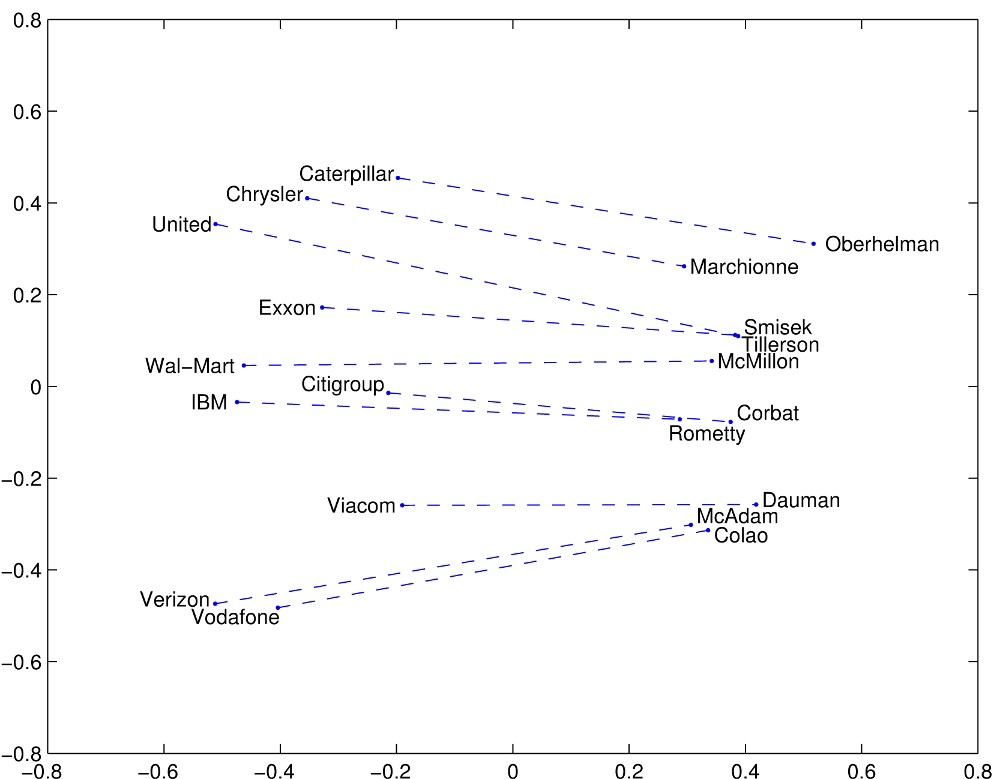

In [46]:
if HYP_DATASET == "Download" and not HYP_ENABLE_TRANSFORMER:
    if HYP_WORD_EMBEDDING == "GLOVE":
        !wget http://nlp.stanford.edu/data/glove.6B.zip
        !unzip glove*.zip
        # !wget http://nlp.stanford.edu/data/glove.6B.200d.zip
        # !unzip glove.6B.200d.zip

    elif HYP_WORD_EMBEDDING == "WORD2VEC":
        pass

    else:
        print("Invalid HYP_WORD_EMBEDDING")
elif HYP_DATASET == "Drive"  and not HYP_ENABLE_TRANSFORMER:
    pass
elif HYP_DATASET == "SKIP"  and not HYP_ENABLE_TRANSFORMER:
    print("Using already downloaded data")

In [47]:
if not HYP_ENABLE_TRANSFORMER:
    if HYP_WORD_EMBEDDING == "GLOVE":
        # Load Glove vectors
        glove_dir = '/content/'
        embeddings_index = {} # empty dictionary

        f = open(os.path.join(glove_dir, 'glove.6B.200d.txt'), encoding="utf-8")

        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
        f.close()

    elif HYP_WORD_EMBEDDING == "WORD2VEC":
        pass

    else:
        print("Invalid HYP_WORD_EMBEDDING")

    print('Found %s word vectors.' % len(embeddings_index))

In [48]:
if not HYP_ENABLE_TRANSFORMER:
    embedding_dim = 200

    # Get 200-dim dense vector for each of the 10000 words in out vocabulary
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    missing_word_list = list()

    for word, i in wordtoix.items():
        #if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # Words not found in the embedding index will be all zeros
            embedding_matrix[i] = embedding_vector
        else:
            missing_word_list.append(word)
    
    if HYP_DEBUG:
        embedding_matrix_tmp = np.zeros((vocab_size, 10))
        print(embedding_matrix_tmp.shape)
        print(embedding_matrix_tmp[:10])

In [49]:
if not HYP_ENABLE_TRANSFORMER:
    missing_word_count=0
    for each in embedding_matrix:
        if not all(each):
            # print(each)
            missing_word_count += 1

    print("number of words missed: %s" % missing_word_count)

## Decoder(LSTM) Network


#### model without attention


In [50]:
if not HYP_ENABLE_ATTENTION and not HYP_ENABLE_TRANSFORMER:
    inputs1 = Input(shape=(2048,)) #2048 is the output of the RESNET50
    fe1 = Dropout(0.5)(inputs1) # Dropping off 50% from the input - 1024
    fe2 = Dense(256, activation='relu')(fe1) #relu 0 if <0.5 and 1 if >=0.5

    # [1,0,0,0,1,1,0,0,1]

    inputs2 = Input(shape=(max_length,)) #max_length = 34
    se1 = Embedding(vocab_size, embedding_dim, mask_zero=True)(inputs2) # embedding_dim = 200, vocab_size = 8762
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(256)(se2)

    decoder1 = add([fe2, se3])

    decoder2 = Dense(256, activation='relu')(decoder1)

    outputs = Dense(vocab_size, activation='softmax')(decoder2)

    lstm_model = Model(inputs=[inputs1, inputs2], outputs=outputs)

#### Model with Attention


Attention Architecture

build()

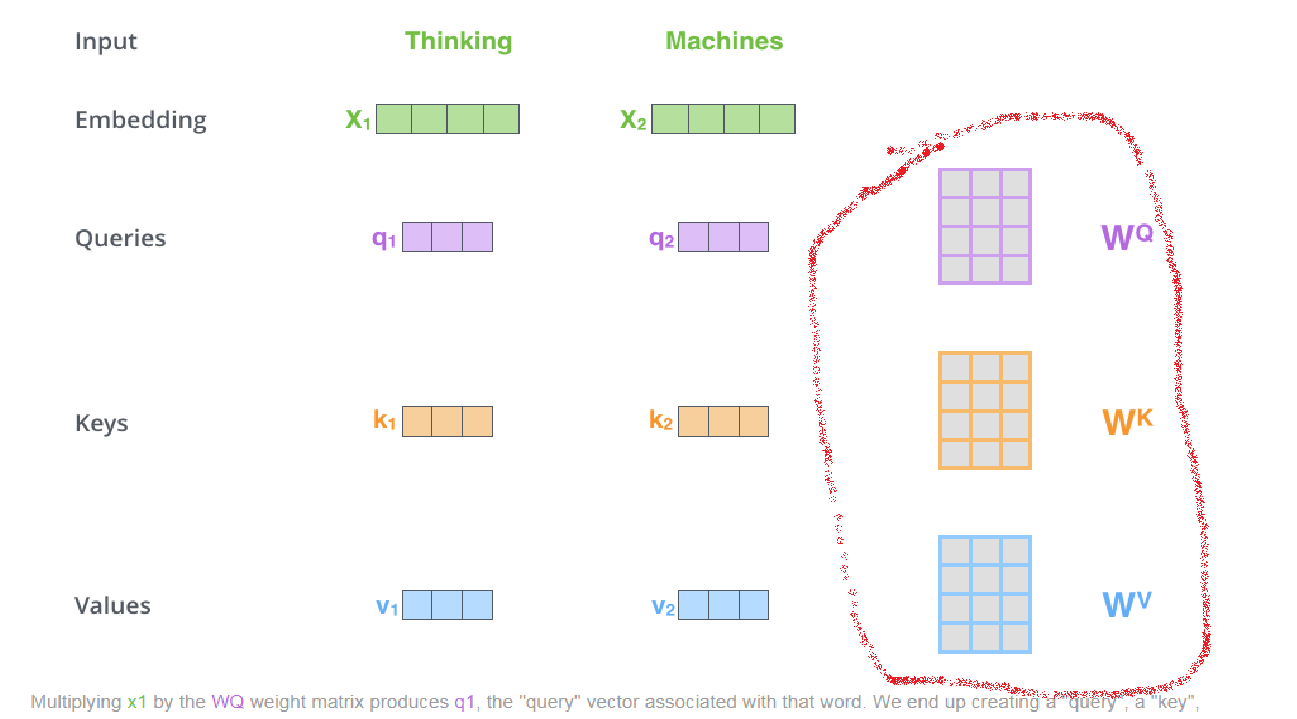

Call()

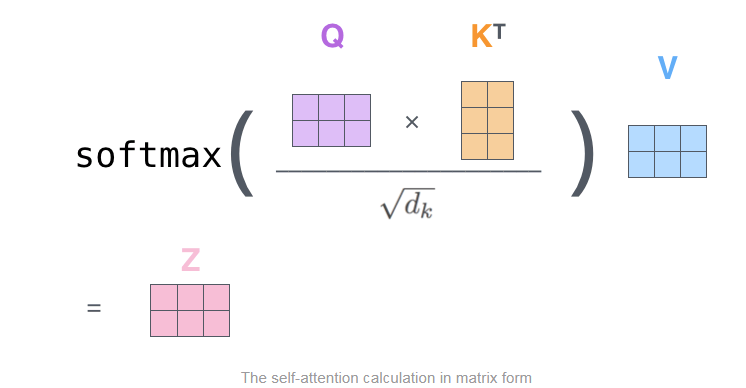

In [51]:
if HYP_ENABLE_ATTENTION:
    class attention(Layer):
        def __init__(self,**kwargs):
            super(attention,self).__init__(**kwargs)

        def build(self,input_shape):
            self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
            self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
            super(attention, self).build(input_shape)

        def call(self,x):
            et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
            at=K.softmax(et)
            at=K.expand_dims(at,axis=-1)
            output=x*at
            return K.sum(output,axis=1)

        def compute_output_shape(self,input_shape):
            return (input_shape[0],input_shape[-1])

        def get_config(self):
            return super(attention,self).get_config()

In [52]:
if HYP_ENABLE_ATTENTION and not HYP_ENABLE_TRANSFORMER:

    inputs1 = Input(shape=(2048,)) #2048 is the output of the RESNET50
    fe1 = Dropout(0.5)(inputs1) # Dropping off 50% from the input - 1024
    fe2 = Dense(256, activation='relu')(fe1) #relu 0 if <0.5 and 1 if >=0.5

    inputs2 = Input(shape=(34,))
    x = Embedding(vocab_size, embedding_dim, mask_zero=True)(inputs2) # embedding_dim = 200, vocab_size = 8762

    att_in=LSTM(256,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(x)
    att_out=attention()(att_in)

    decoder1 = add([fe2, att_out])
    decoder2 = Dense(256, activation='relu')(decoder1)

    outputs = Dense(vocab_size, activation='softmax')(decoder2)

    lstm_model = Model(inputs=[inputs1, inputs2], outputs=outputs)

    lstm_model.summary()

#### Plot the model

In [53]:
if not HYP_ENABLE_TRANSFORMER:
    plot_model(lstm_model, "my_first_model.png", show_shapes=True, show_dtype=True,\
              show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96, \
              layer_range=None, show_layer_activations=True)

#### Compile Decoder model and set parameters

In [54]:
if not HYP_ENABLE_TRANSFORMER:
    # Doubt about this
    METRICS = [
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    if HYP_ENABLE_OPTIMIZER:
        lstm_model.compile(loss=HYP_DECODER_LOSS, optimizer=HYP_DECODER_OPTIMIZER, metrics=METRICS)
    else:
        lstm_model.compile(loss=HYP_DECODER_LOSS, metrics=METRICS)
    epochs = HYP_EPOCH
    number_pics_per_bath = HYP_NO_OF_PICS_PER_BATCH
    steps = len(train_descriptions)//number_pics_per_bath

#### Updating the lstm_model parameters



In [55]:
if HYP_ENABLE_ATTENTION and not HYP_ENABLE_TRANSFORMER:
    print(model.layers[2])
    print(embedding_matrix.shape)

In [56]:
if HYP_ENABLE_ATTENTION and not HYP_ENABLE_TRANSFORMER:
    lstm_model.layers[2].set_weights([embedding_matrix])
    lstm_model.layers[2].trainable = False

#### Transformers

Reference: https://www.analyticsvidhya.com/blog/2021/01/implementation-of-attention-mechanism-for-caption-generation-on-transformers-using-tensorflow/

##### Transformers Architecture

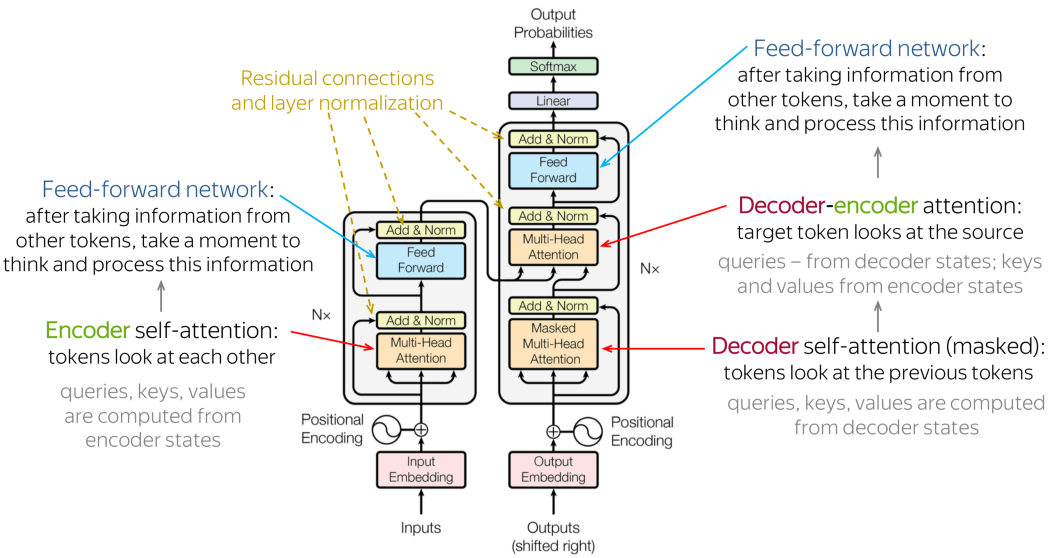

The transformer network employs an encoder-decoder architecture similar to that of an RNN. The main difference is that transformers can receive the input sentence/sequence in parallel, i.e, there is no time step associated with the input, and all the words in the sentence can be passed simultaneously.

###### Positional Encoding

The positional encoding uses sine and cosine functions of different frequencies. For every odd index on the input vector, create a vector using the cos function, for every even index, create a vector using the sin function. Then add those vectors to their corresponding input embeddings which successfully gives the network information on the position of each vector.

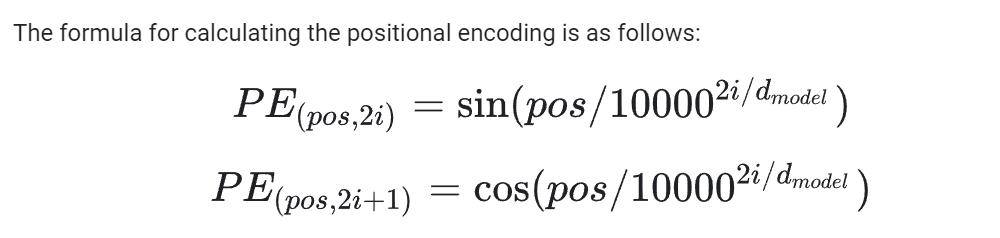

In [57]:
def get_angles(pos, i, d_model):
   angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
   return pos * angle_rates

def positional_encoding_1d(position, d_model):
   angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                           np.arange(d_model)[np.newaxis, :],
                           d_model)

   angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
   angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
   pos_encoding = angle_rads[np.newaxis, ...]
   return tf.cast(pos_encoding, dtype=tf.float32)

def positional_encoding_2d(row,col,d_model):
   assert d_model % 2 == 0
   row_pos = np.repeat(np.arange(row),col)[:,np.newaxis]
   col_pos = np.repeat(np.expand_dims(np.arange(col),0),row,axis=0).reshape(-1,1)

   angle_rads_row = get_angles(row_pos,np.arange(d_model//2)[np.newaxis,:],d_model//2)
   angle_rads_col = get_angles(col_pos,np.arange(d_model//2)[np.newaxis,:],d_model//2)

   angle_rads_row[:, 0::2] = np.sin(angle_rads_row[:, 0::2])
   angle_rads_row[:, 1::2] = np.cos(angle_rads_row[:, 1::2])
   angle_rads_col[:, 0::2] = np.sin(angle_rads_col[:, 0::2])
   angle_rads_col[:, 1::2] = np.cos(angle_rads_col[:, 1::2])
   pos_encoding = np.concatenate([angle_rads_row,angle_rads_col],axis=1)[np.newaxis, ...]
   return tf.cast(pos_encoding, dtype=tf.float32)

###### Multi-Head Attention
Calculate the attention weights. q, k, v must have matching leading dimensions. k, v must have matching penultimate dimension, i.e.: 

seq_len_k = seq_len_v. 

The mask has different shapes depending on its type (padding or look ahead) but it must be broadcastable for addition.

In [58]:
def create_padding_mask(seq):
   seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
   return seq[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)

def create_look_ahead_mask(size):
   mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
   return mask  # (seq_len, seq_len)

def scaled_dot_product_attention(q, k, v, mask):
   matmul_qk = tf.matmul(q, k, transpose_b=True)  # (..., seq_len_q, seq_len_k)
   dk = tf.cast(tf.shape(k)[-1], tf.float32)
   scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)
# .
   if mask is not None:
      scaled_attention_logits += (mask * -1e9) 

   attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1) 
   output = tf.matmul(attention_weights, v)  # (..., seq_len_q, depth_v)

   return output, attention_weights

class MultiHeadAttention(tf.keras.layers.Layer):
   def __init__(self, d_model, num_heads):
      super(MultiHeadAttention, self).__init__()
      self.num_heads = num_heads
      self.d_model = d_model
      assert d_model % self.num_heads == 0
      self.depth = d_model // self.num_heads
      self.wq = tf.keras.layers.Dense(d_model)
      self.wk = tf.keras.layers.Dense(d_model)
      self.wv = tf.keras.layers.Dense(d_model)
      self.dense = tf.keras.layers.Dense(d_model)

   def split_heads(self, x, batch_size):
      x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
      return tf.transpose(x, perm=[0, 2, 1, 3])

   def call(self, v, k, q, mask=None):
      batch_size = tf.shape(q)[0]
      q = self.wq(q)  # (batch_size, seq_len, d_model)
      k = self.wk(k)  # (batch_size, seq_len, d_model)
      v = self.wv(v)  # (batch_size, seq_len, d_model)

      q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
      k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
      v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)

      scaled_attention, attention_weights = scaled_dot_product_attention(q, k, v, mask)
      scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # (batch_size, seq_len_q,      num_heads, depth)

      concat_attention = tf.reshape(scaled_attention,
                                 (batch_size, -1, self.d_model))  # (batch_size, seq_len_q, d_model)

      output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)
      return output, attention_weights


def point_wise_feed_forward_network(d_model, dff):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(dff, activation='relu'),  # (batch_size, seq_len, dff)
        tf.keras.layers.Dense(d_model)  # (batch_size, seq_len, d_model)
        ])

###### Encoder-Decoder Layer


In [59]:
class EncoderLayer(tf.keras.layers.Layer):
   def __init__(self, d_model, num_heads, dff, rate=0.1):
      super(EncoderLayer, self).__init__()
      self.mha = MultiHeadAttention(d_model, num_heads)
      self.ffn = point_wise_feed_forward_network(d_model, dff)

      self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
      self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

      self.dropout1 = tf.keras.layers.Dropout(rate)
      self.dropout2 = tf.keras.layers.Dropout(rate)


   def call(self, x, training, mask=None):
      attn_output, _ = self.mha(x, x, x, mask)  # (batch_size, input_seq_len, d_model)
      attn_output = self.dropout1(attn_output, training=training)
      out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)

      ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
      ffn_output = self.dropout2(ffn_output, training=training)
      out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)
      return out2

In [60]:
class DecoderLayer(tf.keras.layers.Layer):
   def __init__(self, d_model, num_heads, dff, rate=0.1):
      super(DecoderLayer, self).__init__()
      self.mha1 = MultiHeadAttention(d_model, num_heads)
      self.mha2 = MultiHeadAttention(d_model, num_heads)

      self.ffn = point_wise_feed_forward_network(d_model, dff)

      self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
      self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
      self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

      self.dropout1 = tf.keras.layers.Dropout(rate)
      self.dropout2 = tf.keras.layers.Dropout(rate)
      self.dropout3 = tf.keras.layers.Dropout(rate)

   def call(self, x, enc_output, training,look_ahead_mask=None, padding_mask=None):
      attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)  # (batch_size, target_seq_len, d_model)
      attn1 = self.dropout1(attn1, training=training)
      out1 = self.layernorm1(attn1 + x)

      attn2, attn_weights_block2 = self.mha2(enc_output, enc_output, out1, padding_mask) 
      attn2 = self.dropout2(attn2, training=training)
      out2 = self.layernorm2(attn2 + out1)  # (batch_size, target_seq_len, d_model)

      ffn_output = self.ffn(out2)  # (batch_size, target_seq_len, d_model)
      ffn_output = self.dropout3(ffn_output, training=training)
      out3 = self.layernorm3(ffn_output + out2)  # (batch_size, target_seq_len, d_model)

      return out3, attn_weights_block1, attn_weights_block2

In [61]:
class Encoder(tf.keras.layers.Layer):
   def __init__(self, num_layers, d_model, num_heads, dff, row_size,col_size,rate=0.1):
      super(Encoder, self).__init__()
      self.d_model = d_model
      self.num_layers = num_layers

      self.embedding = tf.keras.layers.Dense(self.d_model,activation='relu')
      self.pos_encoding = positional_encoding_2d(row_size,col_size,self.d_model)

      self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]
      self.dropout = tf.keras.layers.Dropout(rate)

   def call(self, x, training, mask=None):
      seq_len = tf.shape(x)[1]
      x = self.embedding(x)  # (batch_size, input_seq_len(H*W), d_model)
      x += self.pos_encoding[:, :seq_len, :]
      x = self.dropout(x, training=training)

      for i in range(self.num_layers):
         x = self.enc_layers[i](x, training, mask)

      return x  # (batch_size, input_seq_len, d_model)

In [62]:
class Decoder(tf.keras.layers.Layer):
   def __init__(self, num_layers,d_model,num_heads,dff, target_vocab_size, maximum_position_encoding,   rate=0.1):
      super(Decoder, self).__init__()
      self.d_model = d_model
      self.num_layers = num_layers

      self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
      self.pos_encoding = positional_encoding_1d(maximum_position_encoding, d_model)

      self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate)
                         for _ in range(num_layers)]
      self.dropout = tf.keras.layers.Dropout(rate)

   def call(self, x, enc_output, training,look_ahead_mask=None, padding_mask=None):
      seq_len = tf.shape(x)[1]
      attention_weights = {}

      x = self.embedding(x)  # (batch_size, target_seq_len, d_model)
      x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
      x += self.pos_encoding[:, :seq_len, :]
      x = self.dropout(x, training=training)

      for i in range(self.num_layers):
         x, block1, block2 = self.dec_layers[i](x, enc_output, training,
                                            look_ahead_mask, padding_mask)
         
         attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
         attention_weights['decoder_layer{}_block2'.format(i+1)] = block2

      return x, attention_weights

###### Transformer

In [63]:
class Transformer(tf.keras.Model):
   def __init__(self, num_layers, d_model, num_heads, dff,row_size,col_size,
              target_vocab_size,max_pos_encoding, rate=0.1):
      super(Transformer, self).__init__()
      self.encoder = Encoder(num_layers, d_model, num_heads, dff,row_size,col_size, rate)
      self.decoder = Decoder(num_layers, d_model, num_heads, dff,
                          target_vocab_size,max_pos_encoding, rate)
      self.final_layer = tf.keras.layers.Dense(target_vocab_size)

   def call(self, inp, tar, training,look_ahead_mask=None,dec_padding_mask=None,enc_padding_mask=None   ):
      enc_output = self.encoder(inp, training, enc_padding_mask)  # (batch_size, inp_seq_len, d_model      )
      dec_output, attention_weights = self.decoder(
      tar, enc_output, training, look_ahead_mask, dec_padding_mask)
      final_output = self.final_layer(dec_output)  # (batch_size, tar_seq_len, target_vocab_size)
      return final_output, attention_weights

###### Model Hyperparameters
Define the parameters for training:

In [64]:
if HYP_ENABLE_TRANSFORMER:
    # top_k = vocab_size
    
    num_layer = 4
    d_model = 512
    dff = 2048
    num_heads = 8
    row_size = 7 # I think this should match with output sixe of resnet 7X 7X 2048
    col_size = 7
    target_vocab_size = top_k + 1
    dropout_rate = 0.1 

In [65]:
if HYP_ENABLE_TRANSFORMER and HYP_DEBUG:
    print(target_vocab_size)
    print(np.arange(target_vocab_size))

    # Temp code
    angle_check = get_angles(np.arange(target_vocab_size)[:, np.newaxis],
                            np.arange(512)[np.newaxis, :],
                            512)
    print(angle_check.shape)
    print(type(angle_check))


    # Temp code
    # apply sin to even indices in the array; 2i
    angle_check[:, 0::2] = np.sin(angle_check[:, 0::2])
    print(angle_check.shape)
    # apply cos to odd indices in the array; 2i+1
    angle_check[:, 1::2] = np.cos(angle_check[:, 1::2])
    pos_encoding_check = angle_check[np.newaxis, ...]
    print(pos_encoding_check.shape)

    # Temp code
    row_pos1 = np.repeat(np.arange(8),8)[:,np.newaxis]
    print("row_pos1", row_pos1.shape)
    col_pos1 = np.repeat(np.expand_dims(np.arange(8),0),8,axis=0).reshape(-1,1)
    print("row_pos1", col_pos1.shape)
    angle_rads_row1 = get_angles(row_pos1,np.arange(512//2)[np.newaxis,:],d_model//2)
    print("angle_rads_row1", angle_rads_row1.shape)
    angle_rads_col1 = get_angles(col_pos1,np.arange(512//2)[np.newaxis,:],d_model//2)
    print("angle_rads_col1", angle_rads_col1.shape)
    #apply sin and cos to odd and even indices resp.
    angle_rads_row1[:, 0::2] = np.sin(angle_rads_row1[:, 0::2])
    angle_rads_row1[:, 1::2] = np.cos(angle_rads_row1[:, 1::2])
    print("angle_rads_row1-1", angle_rads_row1.shape)
    print("angle_rads_col1-1", angle_rads_col1.shape)
    angle_rads_col1[:, 0::2] = np.sin(angle_rads_col1[:, 0::2])
    angle_rads_col1[:, 1::2] = np.cos(angle_rads_col1[:, 1::2])
    print("angle_rads_row1-2", angle_rads_row1.shape)
    print("angle_rads_col1-2", angle_rads_col1.shape)
    pos_encoding1 = np.concatenate([angle_rads_row1,angle_rads_col1],axis=1)[np.newaxis, ...]
    print("pos_encoding1", pos_encoding1.shape)


5001
[   0    1    2 ... 4998 4999 5000]
(5001, 512)
<class 'numpy.ndarray'>
(5001, 512)
(1, 5001, 512)
row_pos1 (64, 1)
row_pos1 (64, 1)
angle_rads_row1 (64, 256)
angle_rads_col1 (64, 256)
angle_rads_row1-1 (64, 256)
angle_rads_col1-1 (64, 256)
angle_rads_row1-2 (64, 256)
angle_rads_col1-2 (64, 256)
pos_encoding1 (1, 64, 512)


In [66]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
   def __init__(self, d_model, warmup_steps=4000):
      super(CustomSchedule, self).__init__()
      self.d_model = d_model
      self.d_model = tf.cast(self.d_model, tf.float32)
      self.warmup_steps = warmup_steps

   def __call__(self, step):
      arg1 = tf.math.rsqrt(step)
      arg2 = step * (self.warmup_steps ** -1.5)
      return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [67]:
if HYP_ENABLE_TRANSFORMER:
    learning_rate = CustomSchedule(d_model)
    optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)
    loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

def loss_function(real, pred):
   mask = tf.math.logical_not(tf.math.equal(real, 0))
   loss_ = loss_object(real, pred)
   mask = tf.cast(mask, dtype=loss_.dtype)
   loss_ *= mask
   return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

In [68]:
if HYP_ENABLE_TRANSFORMER:
    train_loss = tf.keras.metrics.Mean(name='train_loss')
    train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
    transformer = Transformer(num_layer,d_model,num_heads,dff,row_size,col_size,target_vocab_size, max_pos_encoding=target_vocab_size,rate=dropout_rate)

In [69]:
def create_masks_decoder(tar):
   look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
   dec_target_padding_mask = create_padding_mask(tar)
   combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)
   return combined_mask

In [70]:
@tf.function
def train_step(img_tensor, tar):
   tar_inp = tar[:, :-1]
   tar_real = tar[:, 1:]
   dec_mask = create_masks_decoder(tar_inp)
   with tf.GradientTape() as tape:
      predictions, _ = transformer(img_tensor, tar_inp,True, dec_mask)
      loss = loss_function(tar_real, predictions)

   gradients = tape.gradient(loss, transformer.trainable_variables)   
   optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))
   train_loss(loss)
   train_accuracy(tar_real, predictions)

## Training the model

In [71]:
if HYP_ENABLE_TRANSFORMER:
    #temp code
    for (batch1, (img_tensor1, tar1)) in enumerate(dataset):
        print("img_tensor1", img_tensor1.shape)
        print("tar1" , tar1.shape)
        print( tar1[:, :-1].shape)
        print( tar1[:, 1:].shape)
        dec_mask1 = create_masks_decoder(tar1[:, :-1])
        print(dec_mask1.shape)
        break

img_tensor1 (10, 49, 2048)
tar1 (10, 33)
(10, 32)
(10, 32)
(10, 1, 32, 32)


In [72]:
if HYP_ENABLE_TRANSFORMER:
    for epoch in range(HYP_EPOCH):
        start = time()
        train_loss.reset_states()
        train_accuracy.reset_states()

        for (batch, (img_tensor, tar)) in enumerate(dataset): 
            train_step(img_tensor, tar)

            if batch % 500 == 0:
                print ('Epoch {} Batch {} Loss {:.4f} Accuracy {:.4f}'.format(epoch + 1, batch, train_loss.result(), train_accuracy.result()))
    print ('Epoch {} Loss {:.4f} Accuracy {:.4f}'.format(epoch + 1, train_loss.result(), train_accuracy.result()))
    print ('Time taken for 1 epoch: {} secs\n'.format(time() - start))

Epoch 1 Batch 0 Loss 8.6363 Accuracy 0.0000
Epoch 1 Batch 500 Loss 6.2529 Accuracy 0.0404
Epoch 1 Batch 1000 Loss 5.5125 Accuracy 0.0542
Epoch 1 Batch 1500 Loss 5.1547 Accuracy 0.0611
Epoch 1 Batch 2000 Loss 4.9487 Accuracy 0.0654
Epoch 1 Batch 2500 Loss 4.8226 Accuracy 0.0675
Epoch 1 Batch 3000 Loss 4.7465 Accuracy 0.0688
Epoch 2 Batch 0 Loss 4.4286 Accuracy 0.0812
Epoch 2 Batch 500 Loss 4.5404 Accuracy 0.0707
Epoch 2 Batch 1000 Loss 4.5590 Accuracy 0.0701
Epoch 2 Batch 1500 Loss 4.5747 Accuracy 0.0692
Epoch 2 Batch 2000 Loss 4.5869 Accuracy 0.0689
Epoch 2 Batch 2500 Loss 4.5671 Accuracy 0.0693
Epoch 2 Batch 3000 Loss 4.5420 Accuracy 0.0700
Epoch 2 Loss 4.5322 Accuracy 0.0704
Time taken for 1 epoch: 123.129967212677 secs



In [73]:
if HYP_ENABLE_TRANSFORMER and HYP_DEBUG:
    train_loss.result(), train_accuracy.result(), epoch

In [74]:
if not HYP_ENABLE_TRANSFORMER:
    train_features = load(open(pkl_train_file, "rb"))
    print('Photos: train=%d' % len(train_features))

In [75]:
if not HYP_ENABLE_TRANSFORMER:
    # data generator, intended to be used in a call to model.fit_generator()
    def data_generator(descriptions, photos, wordtoix, max_length, num_photos_per_batch):
        X1, X2, y = list(), list(), list()
        n=0
        # loop for ever over images
        while 1:
            for key, desc_list in descriptions.items():
                n+=1
                # retrieve the photo feature
                photo = photos[key+'.jpg']
                for desc in desc_list:
                    # encode the sequence
                    seq = [wordtoix[word] for word in desc.split(' ') if word in wordtoix]
                    # split one sequence into multiple X, y pairs
                    for i in range(1, len(seq)):
                        # split into input and output pair
                        in_seq, out_seq = seq[:i], seq[i]
                        # pad input sequence
                        in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                        # encode output sequence
                        out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                        # store
                        X1.append(photo)
                        X2.append(in_seq)
                        y.append(out_seq)
                # yield the batch data
                if n==num_photos_per_batch:
                    yield [[array(X1), array(X2)], array(y)]
                    X1, X2, y = list(), list(), list()
                    n=0

In [76]:
# # with out optimiser
# if not HYP_ENABLE_TRANSFORMER and not HYP_ENABLE_OPTIMIZER:
#     for i in range(epochs):
#         generator = data_generator(train_descriptions, train_features, wordtoix, max_length, number_pics_per_bath)
#         lstm_model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)
#         lstm_model.save('./model_weights/model_' + str(i) + '.h5')

In [77]:
if not HYP_ENABLE_TRANSFORMER:
    for i in range(epochs):
        generator = data_generator(train_descriptions, train_features, wordtoix, max_length, number_pics_per_bath)
        lstm_model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)
        lstm_model.save('./model_weights/model_attention_with_opt_' + str(i) + '.h5')

## Saving the model weights

In [78]:
if HYP_ENABLE_TRANSFORMER:
    transformer.save_weights('./model_weights/image_caption_transformer_resnet50.h5')
elif not HYP_ENABLE_TRANSFORMER and HYP_ENABLE_ATTENTION and HYP_ENABLE_OPTIMIZER:
    model_weights='./model_weights/model_final_with_attention_with_optimiser.h5'
elif not HYP_ENABLE_TRANSFORMER and HYP_ENABLE_ATTENTION and not HYP_ENABLE_OPTIMIZER:
    model_weights='./model_weights/model_final_with_attention_with_out_optimiser.h5'
elif not HYP_ENABLE_TRANSFORMER and not HYP_ENABLE_ATTENTION and not HYP_ENABLE_OPTIMIZER:
    model_weights='./model_weights/model_final_with_out_attention_with_out_optimiser.h5'
elif not HYP_ENABLE_TRANSFORMER and not HYP_ENABLE_ATTENTION and HYP_ENABLE_OPTIMIZER:
    model_weights='./model_weights/model_final_with_out_attention_with_optimiser.h5'
else:
    print("Not storing the weights")

if not HYP_ENABLE_TRANSFORMER:
    lstm_model.save_weights(model_weights)


## Testing the model / Caption Geneartion

In [79]:
if not HYP_ENABLE_TRANSFORMER:
    lstm_model.load_weights(model_weights)
    
    with open(pkl_test_file, "rb") as encoded_pickle:
        encoding_test = load(encoded_pickle)

In [80]:
if HYP_ENABLE_TRANSFORMER:
    #For transformer code
    def evaluate(image):
        temp_input = tf.expand_dims(load_image(image)[0], 0)
        img_tensor_val = image_features_extract_model(temp_input)
        img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))
        
        start_token = tokenizer.word_index['<start>']
        end_token = tokenizer.word_index['<end>']
        print ("start_token", start_token)
        #decoder input is start token.
        decoder_input = [start_token]
        output = tf.expand_dims(decoder_input, 0) #tokens
        print ("output1", output.shape)
        result = [] #word list
        
        for i in range(100):
            dec_mask = create_masks_decoder(output)
            #print ("dec_mask", dec_mask.shape)
            # predictions.shape == (batch_size, seq_len, vocab_size)
            predictions, attention_weights = transformer(img_tensor_val,output,False,dec_mask)
            
            # select the last word from the seq_len dimension
            predictions = predictions[: ,-1:, :]  # (batch_size, 1, vocab_size)
            
            predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)
            # return the result if the predicted_id is equal to the end token
            if predicted_id == end_token:
                return result,tf.squeeze(output, axis=0), attention_weights
            # concatentate the predicted_id to the output which is given to the decoder
            # as its input.
            result.append(tokenizer.index_word[int(predicted_id)])
            output = tf.concat([output, predicted_id], axis=-1)
        return result,tf.squeeze(output, axis=0), attention_weights
else:
    def greedySearch(photo):
        in_text = 'startseq'
        for i in range(max_length):
            sequence = [wordtoix[w] for w in in_text.split() if w in wordtoix]
            sequence = pad_sequences([sequence], maxlen=max_length)
            yhat = lstm_model.predict([photo,sequence], verbose=0)
            yhat = np.argmax(yhat)
            word = ixtoword[yhat]
            in_text += ' ' + word
            if word == 'endseq':
                break
        final = in_text.split()
        final = final[1:-1]
        final = ' '.join(final)
        return final


## Metrics - BLEU and METEOR

In [81]:
def get_expected_caption(image=None):
    if not HYP_ENABLE_TRANSFORMER:
        expected_captions = descriptions[pic[:-4]]
        expected_captions = [each.split() for each in expected_captions]
    
    if HYP_ENABLE_TRANSFORMER:
        expected_captions = data[data.filename==image].caption.values
        expected_captions = [each.split() for each in expected_captions]
        
    return expected_captions

In [82]:
def get_bleu_scores(image=None, caption=None):
    expected_captions = get_expected_caption(image = image)
    if None in [image, caption]:
        print("Cannot find the BLEU Score")
        return
    print("Expected captions: ", expected_captions)
    
    bleu_score_1_gram = sentence_bleu(expected_captions, caption.split(), weights=(1, 0, 0, 0))
    bleu_score_2_gram = sentence_bleu(expected_captions, caption.split(), weights=(0, 1, 0, 0))
    bleu_score_3_gram = sentence_bleu(expected_captions, caption.split(), weights=(0, 0, 1, 0))
    bleu_score_4_gram = sentence_bleu(expected_captions, caption.split(), weights=(0, 0, 0, 1))
    print('BLEU score 1 Gram -> {}'.format(bleu_score_1_gram))
    print('BLEU score 2 Gram -> {}'.format(bleu_score_2_gram))
    print('BLEU score 3 Gram -> {}'.format(bleu_score_3_gram))
    print('BLEU score 4 Gram -> {}'.format(bleu_score_4_gram))
    print("______________________________________________________________________________")
    

In [83]:
def get_meteor_scores(image=None, caption=None):
    expected_captions = get_expected_caption(image = image)
    
    if None in [expected_captions, caption]:
        print("Cannot find the METEOR Score")
        return
    print("Expected captions: ", expected_captions)
    
    meteor_score_1_gram = meteor_score(expected_captions, caption.split())
    print('METEOR score -> {}'.format(meteor_score_1_gram))
    print("______________________________________________________________________________")

## User interface

start_token 2
output1 (1, 1)


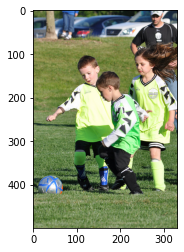

______________________________________________________________________________
Image:  3596131692_91b8a05606.jpg
Generated caption:  two people are playing on the beach
______________________________________________________________________________
Expected captions:  [['children', 'are', 'playing', 'soccer', 'while', 'an', 'adult', 'looks', 'on'], ['children', 'dressed', 'in', 'green', 'and', 'yellow', 'soccer', 'uniforms', 'run', 'after', 'soccer', 'ball'], ['three', 'children', 'in', 'neon', 'colors', 'play', 'soccer', 'while', 'young', 'man', 'watches'], ['three', 'children', 'wearing', 'soccer', 'uniforms', 'chase', 'after', 'blue', 'and', 'grey', 'soccer', 'ball'], ['three', 'child', 'soccer', 'players', 'go', 'for', 'the', 'ball']]
BLEU score 1 Gram -> 0.4953587998572467
BLEU score 2 Gram -> 0.14447964995836363
BLEU score 3 Gram -> 1.928867353251809e-308
BLEU score 4 Gram -> 1.928867353251809e-308
______________________________________________________________________________
Expe

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


METEOR score -> 0.29040404040404044
______________________________________________________________________________


In [84]:
if HYP_SOURCE_DATA_SET == 'F8K':
    pic = "3596131692_91b8a05606.jpg"
elif HYP_SOURCE_DATA_SET == 'F30K':
    pic = "3596131692_91b8a05606.jpg"
else:
    pic = "3596131692_91b8a05606.jpg"

if HYP_ENABLE_TRANSFORMER:
    start_token = tokenizer.word_index['<start>']
    end_token = tokenizer.word_index['<end>']
    image = image_path+"/"+pic
    x=plt.imread(image)

    caption_splitted,result,attention_weights = evaluate(image)
    caption = ' '.join(caption_splitted)

if not HYP_ENABLE_TRANSFORMER:
    image = encoding_test[pic].reshape((1,2048))
    x=plt.imread(image_path+pic)

    caption = greedySearch(image)

plt.imshow(x)
plt.show()
print("______________________________________________________________________________")
print("Image: ", pic)
print("Generated caption: ", caption)
print("______________________________________________________________________________")

if HYP_GENERATE_BLEU_SCORE:
    get_bleu_scores(image=pic, caption=caption)
if HYP_GENERATE_METEOR_SCORE:
    get_meteor_scores(image=pic, caption=caption)

## Stats

In [85]:
print("************************* Hyper Parameters *************************")
print("HYP_SOURCE_DATA_SET = ", HYP_SOURCE_DATA_SET)
print("HYP_ENCODER_MODEL = ", HYP_ENCODER_MODEL)
print("HYP_WORD_EMBEDDING = ", HYP_WORD_EMBEDDING)
print("HYP_ENABLE_TRACE = ", HYP_DEBUG)
print("HYP_ENABLE_ATTENTION = ", HYP_ENABLE_ATTENTION)
print("HYP_DECODER_LOSS = ", HYP_DECODER_LOSS)
print("HYP_DECODER_OPTIMIZER = ", HYP_DECODER_LOSS)
print("HYP_NO_OF_PICS_PER_BATCH = ", HYP_NO_OF_PICS_PER_BATCH)
print("HYP_EPOCH = ", HYP_EPOCH)
print("HYP_DECODER_LEARNING_RATE = ", HYP_DECODER_LEARNING_RATE)
print("\n\n\n")
print("************************* Observations can be taken from above output *************************")

************************* Hyper Parameters *************************
HYP_SOURCE_DATA_SET =  F8K
HYP_ENCODER_MODEL =  RESNET50
HYP_WORD_EMBEDDING =  GLOVE
HYP_ENABLE_TRACE =  True
HYP_ENABLE_ATTENTION =  False
HYP_DECODER_LOSS =  categorical_crossentropy
HYP_DECODER_OPTIMIZER =  categorical_crossentropy
HYP_NO_OF_PICS_PER_BATCH =  100
HYP_EPOCH =  45
HYP_DECODER_LEARNING_RATE =  0.0001




************************* Observations can be taken from above output *************************
